# 下載資料 

In [1]:
from sklearn.datasets import fetch_mldata

#下載MNIST data
mnist = fetch_mldata('MNIST original')
#from sklearn import datasets
#digits = datasets.load_digits()
# 若你使用　datasets.load_digits()　每個數字則為　６４ pixel

In [2]:
mnist.target.shape

(70000,)

In [3]:
mnist.data.shape

(70000, 784)

以上共為　７００００筆資料
每個數字為　７８４　pixel

In [2]:
x = mnist.data
y = mnist.target

In [5]:

x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [3]:


import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
# 定義一個畫圖 function     


In [8]:
x[0].reshape(28, 28).shape

(28, 28)

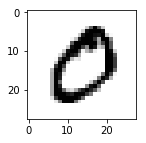

In [9]:
plot_image( x[0].reshape(28, 28))

In [10]:
y[0]

0.0

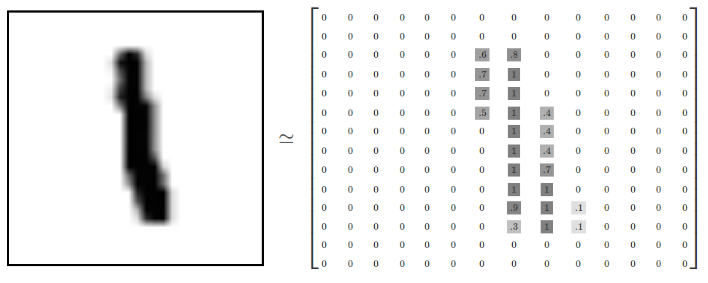

In [4]:
from IPython.display import Image

Image(filename='./image/tf_mnist2.png', width=600)


# 前處理

In [5]:
from sklearn.utils import shuffle

x, y = shuffle(x, y, random_state=34)
# 將data打亂


In [6]:
from sklearn.preprocessing import StandardScaler
#　use StandardScaler() 做特徵 scale, 
sc = StandardScaler() 
sc.fit(x)
x_std = sc.transform(x)


C:\Users\mimur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=0)

# random_state=0 確保每次切分資料的結果都相同
# 訓練集 80%   測試集比例 20%

In [15]:

X_train.shape

(56000, 784)

In [16]:
y_train.shape

(56000,)

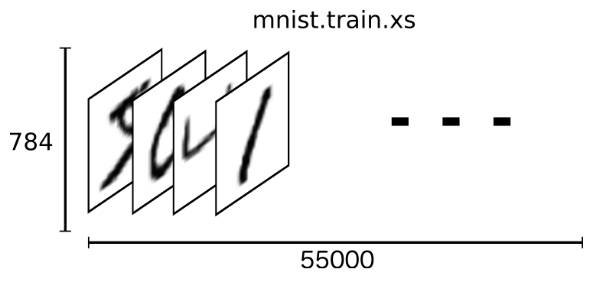

In [17]:
Image(filename='./image/tf_mnist3.png', width=600)



# 特徵提取  PCA

In [ ]:
# X_train, X_test, y_train, y_test 

In [11]:
import numpy as np

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)


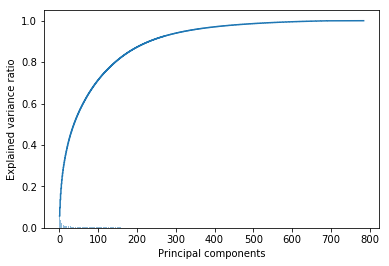

In [20]:
plt.bar(range(1, 785), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 785), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [21]:
# 我們依樣取前名
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
X_train_pca.shape

(56000, 200)

# 分類演算法

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [24]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import accuracy_score


y_pred = lr.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.92


In [29]:
y_pred = lr.predict(X_train_pca)
print('Accuracy: %.2f' % accuracy_score(y_train, y_pred))

Accuracy: 0.92


# 用pipelines簡化工作流程

In [ ]:
# X_train, X_test, y_train, y_test  

In [19]:
# 用 pipeline 串接  PCA, LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# pipeline 的輸入是 tuple ('識別字串',轉換器或是估計器(參數))
# 管線中最後一項會是估計器
pipe_lr = Pipeline([
                    ('pca', PCA(n_components=100)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.907


# 用k-fold cross validation評估模型效能

In [33]:
# from sklearn.model_selection import cross_val_score
# 直接用cross_val_score評估模型
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
# n_jobs : The number of CPUs to use to do the computation. -1 means ‘all CPUs’.
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.90701162  0.90689951  0.90569576]
CV accuracy: 0.907 +/- 0.001


# 學習曲線

In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

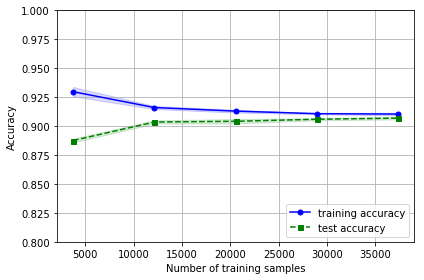

In [12]:
##### import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([
                    ('pca', PCA(n_components=100)),
                    ('clf', LogisticRegression(penalty='l2',random_state=1))])



# penalty='l2' : 正規化
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 5),
                               cv=3,
                               n_jobs=-1)
# train_sizes=np.linspace(0.1, 1.0, 10) 
# array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='test accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()

plt.show()

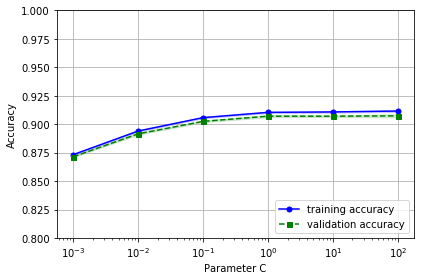

In [13]:
from sklearn.model_selection import validation_curve

#驗證想要評估的參數C對正確率的影響
# validation_curve Accuracy 不是 validation_set 的 Accuracy

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=3)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [14]:
# 調整svm的kernel 參數 以及C 參數


from sklearn.model_selection import GridSearchCV

pipe_lr = Pipeline([
                    ('pca', PCA(n_components=100)),
                    ('clf', LogisticRegression(random_state=1))])
# 參數的範圍
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# 一次調好幾個參數   字典類型的list 傳入
param_grid = [{'clf__C': param_range, }]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=3,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.907428571429
{'clf__C': 100.0}


# 效能評估分析

In [ ]:
# X_train_pca, X_test_pca, y_train, y_test 

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


[[1358    0    6    5    5    9   15    0   15    4]
 [   0 1538   12    2    2    2    2    4   15    1]
 [  14   17 1215   19   22    6   19   27   35    7]
 [   3    7   35 1241    5   45    6   14   28   20]
 [   3    7    6    6 1244    2   14    6    8   47]
 [  11    5    8   59   20 1051   25    7   55   20]
 [  13    4   14    1    6   24 1282    2   13    1]
 [  12    9   17    5   17    4    0 1348    4   37]
 [  11   37   22   30    7   42   12   13 1181   28]
 [   7   10    5   18   43   13    0   64   14 1246]]


In [22]:
import pandas as pd

pd.crosstab(y_test,y_pred,
            rownames=['label'],colnames=['predict'])

predict,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
label,,,,,,,,,,
0.0,1358,0,6,5,5,9,15,0,15,4
1.0,0,1538,12,2,2,2,2,4,15,1
2.0,14,17,1215,19,22,6,19,27,35,7
3.0,3,7,35,1241,5,45,6,14,28,20
4.0,3,7,6,6,1244,2,14,6,8,47
5.0,11,5,8,59,20,1051,25,7,55,20
6.0,13,4,14,1,6,24,1282,2,13,1
7.0,12,9,17,5,17,4,0,1348,4,37
8.0,11,37,22,30,7,42,12,13,1181,28
